Data Loading, Storage and File Formats 
Problem Statement: Analyzing Sales Data from Multiple File Formats 
Dataset: Sales data in multiple file formats (e.g., CSV, Excel, JSON) 
Description: The goal is to load and analyze sales data from different file formats, including 
CSV, Excel, and JSON, and perform data cleaning, transformation, and analysis on the 
dataset. 

1. Load the sales data from each file format into the appropriate data structures or 
dataframes. 
2. Explore the structure and content of the loaded data, identifying any inconsistencies, 
missing values, or data quality issues. 
3. Perform data cleaning operations, such as handling missing values, removing 
duplicates, or correcting inconsistencies. 
4. Convert the data into a unified format, such as a common dataframe or data structure, 
to enable seamless analysis.
5. Perform data transformation tasks, such as merging multiple datasets, splitting 
columns, or deriving new variables. 
6. Analyze the sales data by performing descriptive statistics, aggregating data by 
specific variables, or calculating metrics such as total sales, average order value, or 
product category distribution. 
7. Create visualizations, such as bar plots, pie charts, or box plots, to represent the sales 
data and gain insights into sales trends, customer behavior, or product performance.

# 1.Load the sales data from each file format into the appropriate data structures or dataframes.

In [2]:
import pandas as pd,json,re

In [3]:
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable


In [4]:
dcsv = pd.read_csv('customers.csv')
djson = pd.read_json('customers.json')
dxlsx = pd.read_excel('customers.xlsx')

# 2. Explore the structure and content of the loaded data, identifying any inconsistencies, missing values, or data quality issues.

In [4]:
dcsv.head()

,first_name,last_name,email,phone,address,gender,age,registered,orders,spent,job,hobbies,is_married
0,Joseph,Rice,josephrice131@slingacademy.com,+1-800-040-3135x6208,"91773 Miller Shoal\nDiaztown, FL 38841",male,43,2019-05-05,7,568.29,Artist,Playing sports,False
1,Gary,Moore,garymoore386@slingacademy.com,221.945.4191x8872,"6450 John Lodge\nTerriton, KY 95945",male,71,2020-05-20,11,568.92,Artist,Swimming,True
2,John,Walker,johnwalker944@slingacademy.com,388-142-4883x5370,"27265 Murray Island\nKevinfort, PA 63231",male,44,2020-04-04,11,497.12,Clerk,Painting,False
3,Eric,Carter,ericcarter176@slingacademy.com,(451)259-5402,USNS Knight\nFPO AA 76532,male,38,2019-01-30,17,834.60,Butcher,Playing musical instruments,False
4,William,Jackson,williamjackson427@slingacademy.com,625.626.9133x374,"170 Jackson Loaf\nKristenland, AS 48876",male,58,2022-07-01,14,151.59,Engineer,Reading,False


In [5]:
djson.head()

,first_name,last_name,email,phone,address,gender,age,registered,orders,spent,job,hobbies,is_married
0,Joseph,Rice,josephrice131@slingacademy.com,+1-800-040-3135x6208,"91773 Miller Shoal\nDiaztown, FL 38841",male,43,2019-05-05T00:00:00.000,7,568.29,Artist,Playing sports,False
1,Gary,Moore,garymoore386@slingacademy.com,221.945.4191x8872,"6450 John Lodge\nTerriton, KY 95945",male,71,2020-05-20T00:00:00.000,11,568.92,Artist,Swimming,True
2,John,Walker,johnwalker944@slingacademy.com,388-142-4883x5370,"27265 Murray Island\nKevinfort, PA 63231",male,44,2020-04-04T00:00:00.000,11,497.12,Clerk,Painting,False
3,Eric,Carter,ericcarter176@slingacademy.com,(451)259-5402,USNS Knight\nFPO AA 76532,male,38,2019-01-30T00:00:00.000,17,834.60,Butcher,Playing musical instruments,False
4,William,Jackson,williamjackson427@slingacademy.com,625.626.9133x374,"170 Jackson Loaf\nKristenland, AS 48876",male,58,2022-07-01T00:00:00.000,14,151.59,Engineer,Reading,False


In [6]:
dxlsx.head()

,first_name,last_name,email,phone,address,gender,age,registered,orders,spent,job,hobbies,is_married
0,Joseph,Rice,josephrice131@slingacademy.com,+1-800-040-3135x6208,"91773 Miller Shoal\nDiaztown, FL 38841",male,43,2019-05-05,7,568.29,Artist,Playing sports,False
1,Gary,Moore,garymoore386@slingacademy.com,221.945.4191x8872,"6450 John Lodge\nTerriton, KY 95945",male,71,2020-05-20,11,568.92,Artist,Swimming,True
2,John,Walker,johnwalker944@slingacademy.com,388-142-4883x5370,"27265 Murray Island\nKevinfort, PA 63231",male,44,2020-04-04,11,497.12,Clerk,Painting,False
3,Eric,Carter,ericcarter176@slingacademy.com,(451)259-5402,USNS Knight\nFPO AA 76532,male,38,2019-01-30,17,834.60,Butcher,Playing musical instruments,False
4,William,Jackson,williamjackson427@slingacademy.com,625.626.9133x374,"170 Jackson Loaf\nKristenland, AS 48876",male,58,2022-07-01,14,151.59,Engineer,Reading,False


In [7]:
print(f"Missing values in csv\n{dcsv.isna().sum()}")
print(f"\nMissing values in json\n{djson.isna().sum()}")
print(f"\nMissing values in xlsx\n{dxlsx.isna().sum()}")

Missing values in csv
first_name    0
last_name     0
email         0
phone         0
address       0
gender        0
age           0
registered    0
orders        0
spent         0
job           0
hobbies       0
is_married    0
dtype: int64

Missing values in json
first_name    0
last_name     0
email         0
phone         0
address       0
gender        0
age           0
registered    0
orders        0
spent         0
job           0
hobbies       0
is_married    0
dtype: int64

Missing values in xlsx
first_name    0
last_name     0
email         0
phone         0
address       0
gender        0
age           0
registered    0
orders        0
spent         0
job           0
hobbies       0
is_married    0
dtype: int64


In [8]:
print(f"info of csv")
dcsv.info()
print(f"\ninfo of json")
djson.info()
print(f"\ninfo of xlsx")
dxlsx.info()

info of csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  1000 non-null   object 
 1   last_name   1000 non-null   object 
 2   email       1000 non-null   object 
 3   phone       1000 non-null   object 
 4   address     1000 non-null   object 
 5   gender      1000 non-null   object 
 6   age         1000 non-null   int64  
 7   registered  1000 non-null   object 
 8   orders      1000 non-null   int64  
 9   spent       1000 non-null   float64
 10  job         1000 non-null   object 
 11  hobbies     1000 non-null   object 
 12  is_married  1000 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 94.9+ KB

info of json
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -

# 3. Perform data cleaning operations, such as handling missing values, removing duplicates, or correcting inconsistencies.

In [9]:
dcsv.fillna(0,inplace=True)
djson.fillna(0,inplace=True)
dxlsx.fillna(0,inplace=True)

In [10]:
dcsv[dcsv.duplicated()]

,first_name,last_name,email,phone,address,gender,age,registered,orders,spent,job,hobbies,is_married


In [11]:
djson[djson.duplicated()]

,first_name,last_name,email,phone,address,gender,age,registered,orders,spent,job,hobbies,is_married


In [12]:
dxlsx[dxlsx.duplicated()]

,first_name,last_name,email,phone,address,gender,age,registered,orders,spent,job,hobbies,is_married


In [2]:
dcsv.drop_duplicates(inplace=True)
djson.drop_duplicates(inplace=True)
dxlsx.drop_duplicates(inplace=True)

NameError: name 'dcsv' is not defined

# 4. Convert the data into a unified format, such as a common dataframe or data structure, to enable seamless analysis.

In [14]:
uni_df = pd.concat([dcsv,djson,dxlsx],ignore_index=True)
uni_df.shape

(3000, 13)

# 5. Perform data transformation tasks, such as merging multiple datasets, splitting columns, or deriving new variables.

In [15]:
dcsv['full name'] = dcsv['first_name'] + ' ' + dcsv['last_name']

In [16]:
dcsv.head()

,first_name,last_name,email,phone,address,gender,age,registered,orders,spent,job,hobbies,is_married,full name
0,Joseph,Rice,josephrice131@slingacademy.com,+1-800-040-3135x6208,"91773 Miller Shoal\nDiaztown, FL 38841",male,43,2019-05-05,7,568.29,Artist,Playing sports,False,Joseph Rice
1,Gary,Moore,garymoore386@slingacademy.com,221.945.4191x8872,"6450 John Lodge\nTerriton, KY 95945",male,71,2020-05-20,11,568.92,Artist,Swimming,True,Gary Moore
2,John,Walker,johnwalker944@slingacademy.com,388-142-4883x5370,"27265 Murray Island\nKevinfort, PA 63231",male,44,2020-04-04,11,497.12,Clerk,Painting,False,John Walker
3,Eric,Carter,ericcarter176@slingacademy.com,(451)259-5402,USNS Knight\nFPO AA 76532,male,38,2019-01-30,17,834.60,Butcher,Playing musical instruments,False,Eric Carter
4,William,Jackson,williamjackson427@slingacademy.com,625.626.9133x374,"170 Jackson Loaf\nKristenland, AS 48876",male,58,2022-07-01,14,151.59,Engineer,Reading,False,William Jackson


In [17]:
def extract_pin_code(address):
    match = re.search(r'\b\d{5}\b', address)
    return match


dcsv['pin code'] = [extract_pin_code(add)[0] for add in dcsv['address']]

In [18]:
dcsv.head()

,first_name,last_name,email,phone,address,gender,age,registered,orders,spent,job,hobbies,is_married,full name,pin code
0,Joseph,Rice,josephrice131@slingacademy.com,+1-800-040-3135x6208,"91773 Miller Shoal\nDiaztown, FL 38841",male,43,2019-05-05,7,568.29,Artist,Playing sports,False,Joseph Rice,91773
1,Gary,Moore,garymoore386@slingacademy.com,221.945.4191x8872,"6450 John Lodge\nTerriton, KY 95945",male,71,2020-05-20,11,568.92,Artist,Swimming,True,Gary Moore,95945
2,John,Walker,johnwalker944@slingacademy.com,388-142-4883x5370,"27265 Murray Island\nKevinfort, PA 63231",male,44,2020-04-04,11,497.12,Clerk,Painting,False,John Walker,27265
3,Eric,Carter,ericcarter176@slingacademy.com,(451)259-5402,USNS Knight\nFPO AA 76532,male,38,2019-01-30,17,834.60,Butcher,Playing musical instruments,False,Eric Carter,76532
4,William,Jackson,williamjackson427@slingacademy.com,625.626.9133x374,"170 Jackson Loaf\nKristenland, AS 48876",male,58,2022-07-01,14,151.59,Engineer,Reading,False,William Jackson,48876


# 6. Analyze the sales data by performing descriptive statistics, aggregating data by specific variables, or calculating metrics such as total sales, average order value, or product category distribution.

In [19]:
uni_df.describe()

,age,orders,spent
count,3000.000000,3000.000000,3000.000000
mean,48.145000,10.036000,496.295100
std,18.346339,6.173606,289.132777
min,18.000000,0.000000,0.490000
25%,32.000000,5.000000,248.100000
50%,47.000000,10.000000,469.045000
75%,64.000000,15.000000,739.660000
max,80.000000,20.000000,999.150000


In [20]:
uni_df.groupby('job').agg({'orders':'sum',
                          'spent':'mean'})

,orders,spent
job,,
Accountant,1008,480.695882
Architect,654,549.016667
Artist,591,576.194583
Athlete,906,503.059630
Baker,981,469.264194
Barber,1038,453.617143
Butcher,975,430.244687
Carpenter,471,521.049000
Cashier,831,541.296538


In [21]:
uni_df['spent'].sum() #calc total sales

1488885.2999999998

In [22]:
uni_df['spent'].mean() 

496.29509999999993

In [23]:
uni_df['job'].value_counts() 

job
Lawyer            111
Barber            105
Tailor            102
Receptionist      102
Accountant        102
Mechanic           99
Chef               96
Butcher            96
Doctor             96
Baker              93
Dentist            90
Janitor            90
Unemployed         84
Hairdresser        81
Nurse              81
Athlete            81
Security Guard     81
Waitress           81
Cashier            78
Student            78
Firefighter        78
Housewife          78
Engineer           78
Polic              75
Waiter             75
Architect          72
Teacher            72
Pilot              72
Clerk              72
Artist             72
Farmer             69
Politician         69
Unkown             66
Scientist          63
Officer            60
Carpenter          60
Librarian          42
Name: count, dtype: int64

# 7. Create visualizations, such as bar plots, pie charts, or box plots, to represent the sales data and gain insights into sales trends, customer behavior, or product performance.

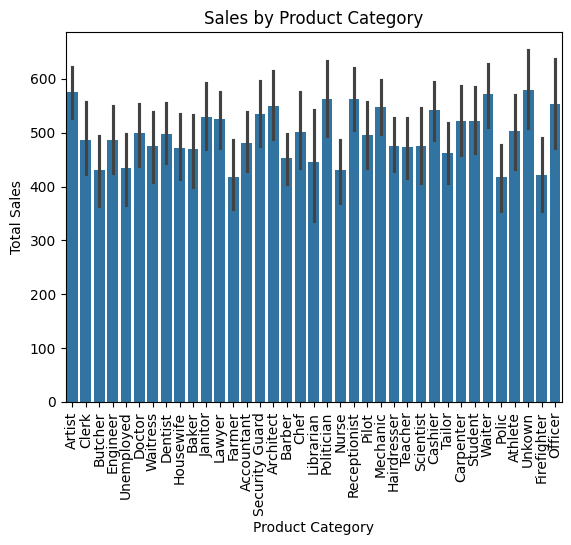

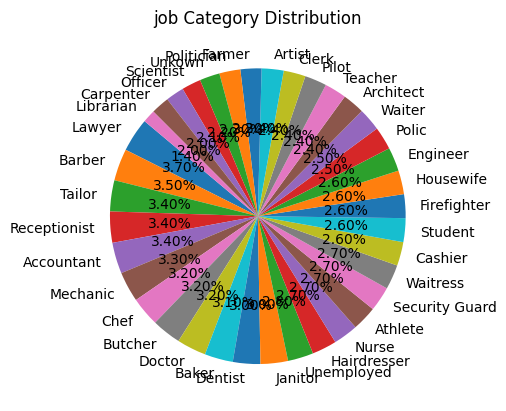

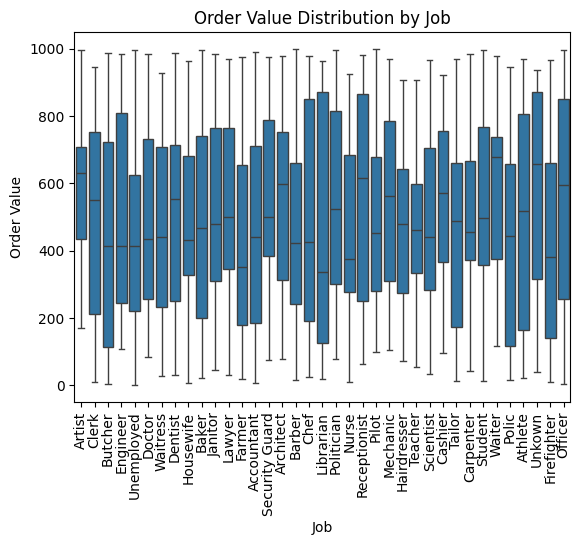

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='job', y='spent', data=uni_df)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

# Create a pie chart to represent the distribution of product categories
product_distribution = uni_df['job'].value_counts()
plt.pie(product_distribution, labels=product_distribution.index, autopct='%1.2f%%', startangle=140)
plt.title('job Category Distribution')
plt.xticks(rotation=90)
plt.show()

# Create a box plot to visualize the distribution of order values
sns.boxplot(x='job', y='spent', data=uni_df)
plt.title('Order Value Distribution by Job')
plt.xlabel('Job')
plt.ylabel('Order Value')
plt.xticks(rotation=90)
plt.show()